<a href="https://colab.research.google.com/github/RyanChen12035/w266_final_Anatomy-and-Structured-Prunning/blob/main/anatomy_gradient_analysis_Llama2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 12.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

base_model = "NousResearch/Llama-2-7b-hf"
model = AutoModelForCausalLM.from_pretrained(
    base_model,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map={"": 0},
)

tokenizer = AutoTokenizer.from_pretrained(base_model, use_fast=True)
tokenizer.pad_token = tokenizer.unk_token
tokenizer.padding_side = "right"

# model is not in training
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuratio

tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
 

In [3]:
from datasets import load_dataset
import torch

dataset_name = 'super_glue'
config = 'boolq'
dataset = load_dataset(dataset_name, config)
dataset

Generating train split:   0%|          | 0/9427 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3270 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3245 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'passage', 'idx', 'label'],
        num_rows: 9427
    })
    validation: Dataset({
        features: ['question', 'passage', 'idx', 'label'],
        num_rows: 3270
    })
    test: Dataset({
        features: ['question', 'passage', 'idx', 'label'],
        num_rows: 3245
    })
})

In [4]:
def template_prompt_engineering(example):
  # add system template of Llama2 and prompt engineering for the boolq task
  example['label'] = "the correct answer is true" if example['label'] else "the correct answer is false"
  example['question'] = f"""Please answer the following queation with true or false, question: {example['question']}?\n\nAnswer format: true/false"""
  example['text'] = f"""<s>[INST]<<sys>>Below is an instruction that describes a task. Write a response that appropriately completes the request<</sys>>
        ### Instruction:
        {example['question']}[/INST]

        ### Response:
        {example['label']}
        """
  return example

dataset_withtemplate = dataset.map(template_prompt_engineering, remove_columns=['question', 'passage', 'idx', 'label'])

Map:   0%|          | 0/9427 [00:00<?, ? examples/s]

Map:   0%|          | 0/3270 [00:00<?, ? examples/s]

Map:   0%|          | 0/3245 [00:00<?, ? examples/s]

In [5]:
dataset_withtemplate['train']['text'][:4]

['<s>[INST]<<sys>>Below is an instruction that describes a task. Write a response that appropriately completes the request<</sys>>\n        ### Instruction:\n        Please answer the following queation with true or false, question: do iran and afghanistan speak the same language?\n\nAnswer format: true/false[/INST]\n\n        ### Response:\n        the correct answer is true\n        ',
 '<s>[INST]<<sys>>Below is an instruction that describes a task. Write a response that appropriately completes the request<</sys>>\n        ### Instruction:\n        Please answer the following queation with true or false, question: do good samaritan laws protect those who help at an accident?\n\nAnswer format: true/false[/INST]\n\n        ### Response:\n        the correct answer is true\n        ',
 '<s>[INST]<<sys>>Below is an instruction that describes a task. Write a response that appropriately completes the request<</sys>>\n        ### Instruction:\n        Please answer the following queation wi

In [6]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [7]:
texts = dataset_withtemplate['train']['text'][:1]
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
inputs.to(device)

outputs = model(**inputs, output_hidden_states=True)
last_hidden_state = outputs.hidden_states[-1]
all_hidden_states = outputs.hidden_states
print(last_hidden_state.shape)
# 4 examples, 94 token seqeunce length, 4096 embedding dimensions

torch.Size([1, 92, 4096])


In [19]:
# # no hook is good
# input_representations = all_hidden_states[0]  #input for the first layer of transformer
# input_representations.retain_grad()   # make sure the tensor is in the graph and ready for gradient calculation

# logit_last = last_hidden_state[:, -1, :]  # shape of 32, 4096
# print(logit_last.shape)
# output = logit_last.mean(dim=0).sum()
# output.backward()

# input_representations_grad = input_representations.grad
# print("input_representations shape: ", input_representations_grad.shape)

torch.Size([1, 4096])
input_representations shape:  torch.Size([1, 92, 4096])


In [18]:
len(outputs.hidden_states)

33

In [7]:
last_hidden_state[:, -1, :].shape

torch.Size([1, 4096])

In [8]:
model.model.layers

ModuleList(
  (0-31): 32 x LlamaDecoderLayer(
    (self_attn): LlamaSdpaAttention(
      (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
      (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
      (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
      (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
      (rotary_emb): LlamaRotaryEmbedding()
    )
    (mlp): LlamaMLP(
      (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
      (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
      (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
      (act_fn): SiLU()
    )
    (input_layernorm): LlamaRMSNorm()
    (post_attention_layernorm): LlamaRMSNorm()
  )
)

In [9]:
# gradient is not passing throught layer level module, collect the gradient from submodules and average them instead..

# Function to apply hooks
gradients = {f'Layer {i+1}': [] for i in range(len(model.model.layers))}
def save_grad(layer):
    def hook(module, grad_input, grad_output):
        if grad_output[0] is not None:
            print(f'Grad shape at {layer}:', grad_output[0].shape)
            gradients[layer].append(grad_output[0].mean(dim=0).clone().detach().cpu().numpy())
        else:
            print(f"No grad output for layer {layer}")
        return None
    return hook

# Apply hooks to all submodules within the transformer layers
for i, layer in enumerate(model.model.layers):
    print(f'Applying hook to layer {i+1}')
    layer.input_layernorm.register_full_backward_hook(save_grad(f'Layer {i+1}'))
    layer.post_attention_layernorm.register_full_backward_hook(save_grad(f'Layer {i+1}'))
    layer.self_attn.q_proj.register_full_backward_hook(save_grad(f'Layer {i+1}'))
    layer.self_attn.k_proj.register_full_backward_hook(save_grad(f'Layer {i+1}'))
    layer.self_attn.v_proj.register_full_backward_hook(save_grad(f'Layer {i+1}'))
    layer.self_attn.o_proj.register_full_backward_hook(save_grad(f'Layer {i+1}'))
    layer.mlp.gate_proj.register_full_backward_hook(save_grad(f'Layer {i+1}'))
    layer.mlp.up_proj.register_full_backward_hook(save_grad(f'Layer {i+1}'))
    layer.mlp.down_proj.register_full_backward_hook(save_grad(f'Layer {i+1}'))

# Calculate gradients
# Get the last token
logit_last = last_hidden_state[:, -1, :]  # shape of 1, 4096
output = logit_last.mean(dim=0).sum()  # Average all examples and sum up as a scalar

# Perform backward pass
model.zero_grad()  # Zero the gradients before the backward pass
output.backward()

# Combine gradients at the layer level
combined_gradients = {layer: sum(grads) / len(grads) for layer, grads in gradients.items() if grads}

# haven't tried it on A100

Applying hook to layer 1
Applying hook to layer 2
Applying hook to layer 3
Applying hook to layer 4
Applying hook to layer 5
Applying hook to layer 6
Applying hook to layer 7
Applying hook to layer 8
Applying hook to layer 9
Applying hook to layer 10
Applying hook to layer 11
Applying hook to layer 12
Applying hook to layer 13
Applying hook to layer 14
Applying hook to layer 15
Applying hook to layer 16
Applying hook to layer 17
Applying hook to layer 18
Applying hook to layer 19
Applying hook to layer 20
Applying hook to layer 21
Applying hook to layer 22
Applying hook to layer 23
Applying hook to layer 24
Applying hook to layer 25
Applying hook to layer 26
Applying hook to layer 27
Applying hook to layer 28
Applying hook to layer 29
Applying hook to layer 30
Applying hook to layer 31
Applying hook to layer 32


OutOfMemoryError: CUDA out of memory. Tried to allocate 32.00 MiB. GPU 0 has a total capacity of 22.17 GiB of which 8.88 MiB is free. Process 8569 has 22.15 GiB memory in use. Of the allocated memory 21.79 GiB is allocated by PyTorch, and 136.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# Retain gradients for each layer's hidden states
# haven't tried it yet

for i, hidden_state in enumerate(all_hidden_states):
    hidden_state.retain_grad()

# Get the last token's hidden state
logit_last = last_hidden_state[:, -1, :]  # shape of 1, 4096
logit_last.requires_grad = True  # Ensure requires_grad is True
output = logit_last.mean(dim=0).sum()  # Average all examples and sum up as a scalar

# Perform backward pass
model.zero_grad()  # Zero the gradients before the backward pass
output.backward()

# Capture gradients for each layer
layer_gradients = {}
for i, hidden_state in enumerate(all_hidden_states):
    if hidden_state.grad is not None:
        layer_gradients[f'Layer {i+1}'] = hidden_state.grad.mean(dim=1).clone().detach().cpu().numpy()  # Average over the sequence length
layer_gradients

In [9]:
# # Function to apply hooks
# gradients = {}
# def save_grad(layer):
#     def hook(module, grad_input, grad_output):
#         if grad_output[0] is not None:
#             print(f'Grad shape at {layer}:', grad_output[0].shape)
#             gradients[layer] = grad_output[0].mean(dim=0).clone().detach().cpu().numpy()
#         else:
#             print(f"No grad output for layer {layer}")
#         return None
#     return hook

# # Apply hooks to all layers
# for i, layer in enumerate(model.model.layers):
#     # print(f'Applying hook to layer {i+1}')
#     layer.register_full_backward_hook(save_grad(f'Layer {i+1}'))

# # Calculate gradients
# # get the last token
# logit_last = last_hidden_state[:, -1, :]  # shape of 32, 4096
# output = logit_last.mean(dim=0).sum()  # average all examples and sum up as a scalar

# model.zero_grad()
# output.backward()
# gradients

{}

In [10]:
logit_last.requires_grad

True

In [11]:
logit_last.mean(dim=0).sum()

tensor(58.3438, device='cuda:0', dtype=torch.float16, grad_fn=<SumBackward0>)

In [12]:
output

tensor(58.3438, device='cuda:0', dtype=torch.float16, grad_fn=<SumBackward0>)

In [ ]:
# can't figure out why the gradient is empty
# without hook, only apply the input of the first layer -- good

KeyError: 'Layer 1'

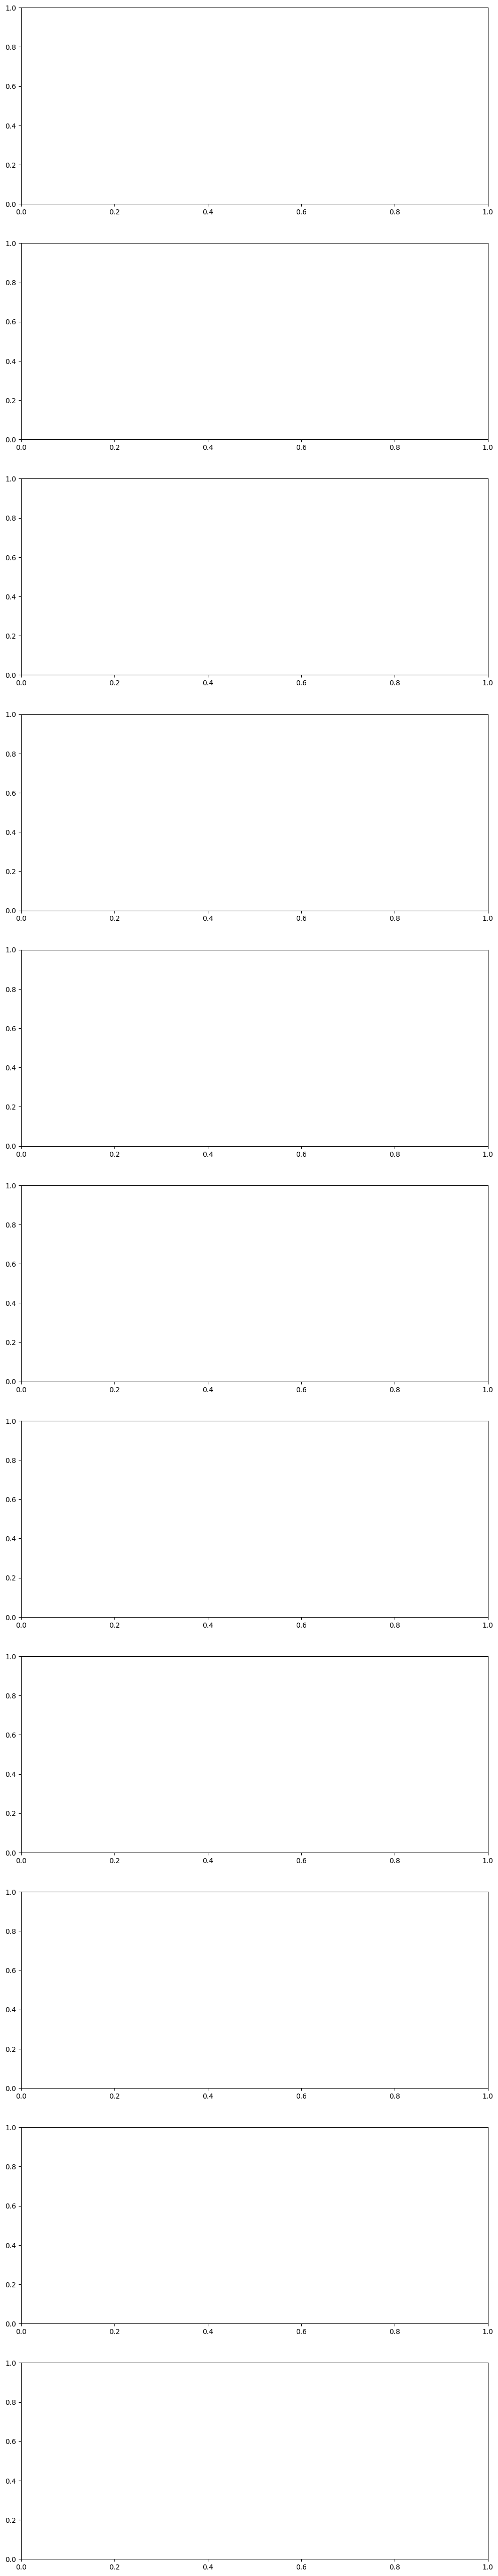

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

layers_to_visualize = ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6', 'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11']

# Setup the number of subplots needed based on the layers you want to visualize
num_layers = len(layers_to_visualize)
fig, axes = plt.subplots(num_layers, 1, figsize=(12, 6 * num_layers))  # Adjust size as needed

# Define the colorbar range
vmin = 0  # Minimum value of the gradient magnitude to display
vmax = 0.0002  # Maximum value of the gradient magnitude to display

# Loop through each layer and create a heatmap
for ax, layer in zip(axes, layers_to_visualize):
    gradient_matrix = gradients[layer]

    first_20_tokens = gradient_matrix[:20, :]  # exclude cls
    # Plot heatmap
    sns.heatmap(abs(first_20_tokens), ax=ax, cmap='viridis', cbar=True, vmin=vmin, vmax=vmax)
    ax.set_title(f'Gradients for {layer}')
    ax.set_xlabel('Embedding Dimension')
    ax.set_ylabel('Token Position')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming hidden_states is obtained from the model outputs
cls_similarities = []

# Extract the last token from the last layer for comparison
final_cls = last_hidden_state[:, -1, :]  # Last layer, last token

for i in range(len(all_hidden_states) - 1):  # Exclude the last layer as it is used for comparison
    current_cls = all_hidden_states[i][:, -1, :]  # Last token of each layer
    # Compute cosine similarity and take the mean across the batch if needed
    cosine_sim = F.cosine_similarity(current_cls, final_cls, dim=1).mean().item()
    cls_similarities.append(cosine_sim)

# Plot the cosine similarities between the last token of each layer and the last layer's last token
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(all_hidden_states)), cls_similarities, marker='o', linestyle='-')
plt.title('Cosine Similarity of Last Token Across Layers to Final Layer')
plt.xlabel('Layer')
plt.ylabel('Cosine Similarity')
plt.xticks(range(1, len(all_hidden_states)))  # Adjust the x-ticks to match layer numbers
plt.grid(True)
plt.show()